In [30]:
#Liz Ponting 
# Project 
# Analysis of Word Count by gender and ethnicity for Oscars Best Picture.  Have the films become more diverse? 

#34 points needed 
# import (2), additional data set (1) create own dataset (2), join (4), groupby (3),statistical metrics (3), github push (6),plots (6), linear model (2), git commits (3) = 31 points

# linear models (4), functions (2) - 9


In [31]:
# Import the Actor (2 points) and Character Word Count files (1 point)
import pandas as pd
actor = pd.read_csv(r'C:\Users\Liz Ponting\Desktop\actor-metrics.csv')
words = pd.read_csv(r'C:\Users\Liz Ponting\Desktop\character-word-counts.csv')

# Created additional data set to determine if age is also a factor (2 points)
age = pd.read_csv(r'C:\Users\Liz Ponting\Desktop\actor-birthdays.csv')

In [32]:
# Combine the three data sets using Join (4 points)
joined_data_one = pd.merge(actor, words,on='actor')
joined_data_two = pd.merge(joined_data_one,age,on='actor')
joined_data_two.head()

,year_x,film_x,actor,characters_x,imdb,gender,race,race_simple,words,sentences,year_y,film_y,character,word,count,year,film,characters_y,Birthyear,AgeDuringFilm
0,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,male,White/Caucasian,White,216.0,15.0,1989,born-on-the-fourth-of-july,COLONEL,'bout,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45
1,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,male,White/Caucasian,White,216.0,15.0,1989,born-on-the-fourth-of-july,COLONEL,82nd,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45
2,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,male,White/Caucasian,White,216.0,15.0,1989,born-on-the-fourth-of-july,COLONEL,airborne,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45
3,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,male,White/Caucasian,White,216.0,15.0,1989,born-on-the-fourth-of-july,COLONEL,answer,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45
4,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,male,White/Caucasian,White,216.0,15.0,1989,born-on-the-fourth-of-july,COLONEL,arty,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45


In [92]:
# Explore the data using group by functions  (3 points) 
# Statistical Metrics used here to learn about the data (1.5 point)
joined_data_two.groupby(['year_x','gender']).agg({'count':['sum','mean','median']})

count                 
                 sum      mean median
year_x gender                        
1989   female   2546  1.538369      1
       male     9615  1.526190      1
2015   female   8161  1.485980      1
       male    28067  1.427474      1
2017   female   8710  1.482553      1
       male    30664  1.386696      1

In [88]:
# Explore wordcount by film & gender 
# Statistical Metric (0.5 point)
wordcount = joined_data_two.groupby(['year_x','film_x','gender']).agg({'words':['sum']}).unstack()
wordcount.head()

words           
                                         sum           
gender                                female       male
year_x film_x                                          
1989   born-on-the-fourth-of-july    31608.0   787794.0
       dead-poets-society             7735.0   702659.0
       driving-miss-daisy          2408667.0  2888724.0
       field-of-dreams              522436.0  3376923.0
       my-left-foot                 351071.0  1689185.0

In [35]:
# Pivot table to explore data in a different way 
# Statistical metric (0.5 point)
joined_data_two.pivot_table(columns='year',index=['gender','race'],values='words',aggfunc='count')

year                             1989     2015     2017
gender race                                            
female 2+ Race                    NaN    150.0    111.0
       Asian                      NaN     48.0      NaN
       Black/African American    70.0     63.0    356.0
       Hispanic/Latino            NaN     44.0     30.0
       White/Caucasian         1585.0   5187.0   5378.0
male   2+ Race                    NaN     98.0     95.0
       Asian                      NaN    146.0      NaN
       Black/African American   967.0    403.0    675.0
       Hispanic/Latino            NaN    142.0      NaN
       White/Caucasian         5333.0  18873.0  21343.0

In [36]:
# Calculate percentages in regards to the race of the actors in the films
# Statistical metric (.5 points)

racepercent = joined_data_two.pivot_table(index=['year'],columns=['race'],values='words',aggfunc='count')
racepercent.fillna(0,inplace=True)
racepercent['WhitePercent'] = racepercent['White/Caucasian'] / (racepercent['2+ Race'] + racepercent['Asian'] + racepercent['Black/African American'] + racepercent['Hispanic/Latino'] + racepercent['White/Caucasian']) *100
racepercent['AllElsePercent'] = (racepercent['2+ Race'] + racepercent['Asian'] + racepercent['Black/African American'] + racepercent['Hispanic/Latino']) / (racepercent['2+ Race'] + racepercent['Asian'] + racepercent['Black/African American'] + racepercent['Hispanic/Latino'] + racepercent['White/Caucasian']) * 100
racepercent.head()

race,2+ Race,Asian,Black/African American,Hispanic/Latino,White/Caucasian,WhitePercent,AllElsePercent
year,,,,,,,
1989,0.0,0.0,1037.0,0.0,6918.0,86.964173,13.035827
2015,248.0,194.0,466.0,186.0,24060.0,95.650791,4.349209
2017,206.0,0.0,1031.0,30.0,26721.0,95.473060,4.526940


In [37]:
# Calculate percentages in regards to the gender of the actors in the films

genderpercentbyFilm = joined_data_two.pivot_table(index=['year','film_x'],columns=['gender'],values='words',aggfunc='count')
genderpercentbyFilm.fillna(0,inplace=True)

genderpercentbyFilm['malePercent'] = genderpercentbyFilm['male'] / (genderpercentbyFilm['male'] + genderpercentbyFilm['female'])*100
genderpercentbyFilm['femalePercent'] = genderpercentbyFilm['female'] / (genderpercentbyFilm['male'] + genderpercentbyFilm['female'])*100
genderpercentbyFilm.head()

gender                           female    male  malePercent  femalePercent
year film_x                                                                
1989 born-on-the-fourth-of-july   106.0  1031.0    90.677221       9.322779
     dead-poets-society            35.0  1119.0    96.967071       3.032929
     driving-miss-daisy           728.0  1052.0    59.101124      40.898876
     field-of-dreams              427.0  1351.0    75.984252      24.015748
     my-left-foot                 359.0  1053.0    74.575071      25.424929

In [38]:
# Calculate percentages in regards to the gender of the actors by year
genderpercentbyYear = joined_data_two.pivot_table(index=['year'],columns=['gender'],values='words',aggfunc='count')
genderpercentbyYear.fillna(0,inplace=True)
genderpercentbyYear['malePercent'] = genderpercentbyYear['male'] / (genderpercentbyYear['male'] + genderpercentbyYear['female'])*100
genderpercentbyYear['femalePercent'] = genderpercentbyYear['female'] / (genderpercentbyYear['male'] + genderpercentbyYear['female'])*100
genderpercentbyYear.head()

gender,female,male,malePercent,femalePercent
year,,,,
1989,1655,6300,79.195475,20.804525
2015,5492,19662,78.166494,21.833506
2017,5875,22113,79.008861,20.991139


In [39]:
# Import necessary libraries for models & visualization  

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [80]:
# Transform gender from categorical variable to number via one-hot encoding for modeling 

cat_cols_gender = joined_data_two[['gender']]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(cat_cols_gender)
cat_cols_1hot=encoder.transform(cat_cols_gender)
cat_cols_1hot_df = pd.DataFrame(cat_cols_1hot,columns=encoder.get_feature_names())
datav2 = pd.concat([joined_data_two.drop(['gender'],axis=1),cat_cols_1hot_df],axis=1)
datav2.head()

,year_x,film_x,actor,characters_x,imdb,race,race_simple,words,sentences,year_y,...,character,word,count,year,film,characters_y,Birthyear,AgeDuringFilm,x0_female,x0_male
0,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,White/Caucasian,White,216.0,15.0,1989,...,COLONEL,'bout,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45,0.0,1.0
1,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,White/Caucasian,White,216.0,15.0,1989,...,COLONEL,82nd,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45,0.0,1.0
2,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,White/Caucasian,White,216.0,15.0,1989,...,COLONEL,airborne,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45,0.0,1.0
3,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,White/Caucasian,White,216.0,15.0,1989,...,COLONEL,answer,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45,0.0,1.0
4,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,White/Caucasian,White,216.0,15.0,1989,...,COLONEL,arty,1,1989,born-on-the-fourth-of-july,COLONEL,1944,45,0.0,1.0


In [86]:
# Create a linear regression model to determine if the word count can be predicted by the gender, age, & year the film was produced  
# Linear model trained and used (2 points)
y = datav2['words']
X = datav2[['AgeDuringFilm','x0_female','x0_male','year']]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=649)
Xtest.fillna(Xtest.mean())
Xtrain.fillna(Xtrain.mean())
ytrain.fillna(ytrain.mean())
ytest.fillna(ytest.mean())

37431    2491.0
49132     471.0
35770    1137.0
32038    1338.0
3459     3343.0
          ...  
9947      178.0
1467      801.0
25875    1538.0
57520    2783.0
19643    3357.0
Name: words, Length: 15275, dtype: float64

In [48]:
ytrain.head()

30699    1163.0
36898    1895.0
30613    1163.0
54822    1406.0
24800     492.0
Name: words, dtype: float64

In [49]:
ytest.head()

37431    2491.0
49132     471.0
35770    1137.0
32038    1338.0
3459     3343.0
Name: words, dtype: float64

In [50]:
Xtrain.head()

,AgeDuringFilm,x0_female,x0_male,year
30699,48,0.0,1.0,2015
36898,35,0.0,1.0,2015
30613,48,0.0,1.0,2015
54822,62,1.0,0.0,2017
24800,38,0.0,1.0,2015


In [51]:
Xtest.head()

,AgeDuringFilm,x0_female,x0_male,year
37431,53,0.0,1.0,2015
49132,22,0.0,1.0,2017
35770,32,0.0,1.0,2015
32038,37,1.0,0.0,2015
3459,52,0.0,1.0,1989


In [52]:
Xtrain.shape

(45822, 4)

In [53]:
Xtest.shape

(15275, 4)

In [54]:
ytrain.shape

(45822,)

In [55]:
ytest.shape

(15275,)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model_gender = LinearRegression(fit_intercept=True)
model_gender

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model_gender.fit(Xtrain,ytrain)
model_gender

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# This model indicates that using age, gender and year of film is not enough to predict word count in a film
model_gender.score(Xtest,ytest)

0.03856180408646237

In [60]:
females = datav2.loc[datav2['x0_female'] == 1]
males = datav2.loc[datav2['x0_female'] == 0]

In [61]:
# Visualize the data to determine if the Oscar winning filmns have become more diverse. 

In [62]:
females['film_x'].max()

'three-billboards-outside-ebbing-missouri'

In [63]:
genderpercent.head()

gender                           female    male  malePercent  femalePercent
year film_x                                                                
1989 born-on-the-fourth-of-july   106.0  1031.0    90.677221       9.322779
     dead-poets-society            35.0  1119.0    96.967071       3.032929
     driving-miss-daisy           728.0  1052.0    59.101124      40.898876
     field-of-dreams              427.0  1351.0    75.984252      24.015748
     my-left-foot                 359.0  1053.0    74.575071      25.424929

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff844bbb48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff844bbcc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff844bb248>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff844c8e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff844c8f08>],
 'means': []}

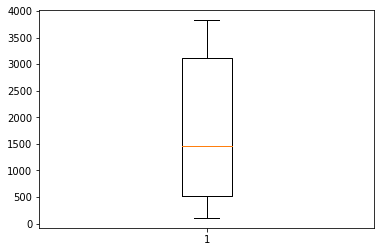

In [64]:
plt.boxplot('words',data=females)
# plot (1 point)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff8652f508>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff8652ffc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff86526d48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff86535b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff86535f08>],
 'means': []}

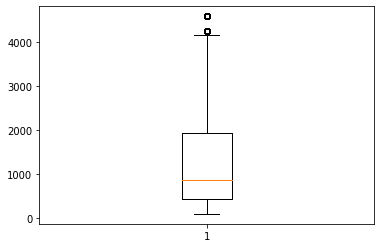

In [65]:
plt.boxplot('words',data=males)
# plot (1 point)

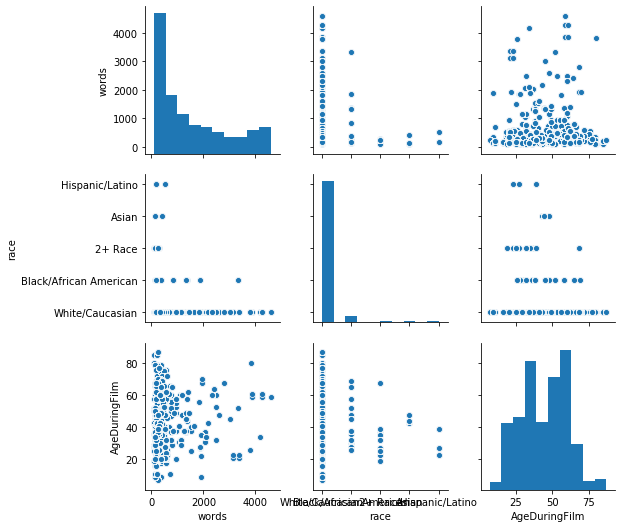

In [66]:
sns.pairplot(datav2, vars=['words','race','AgeDuringFilm'])
# plot 1 point 

In [67]:
graph1 = joined_data_two.pivot_table(index='year',columns=['gender'],values='words',aggfunc='count')
graph1

gender,female,male
year,,
1989,1655,6300
2015,5492,19662
2017,5875,22113


Text(0.5, 1.0, 'Total Words Spoken by Men vs. Women in Best Picture Films')

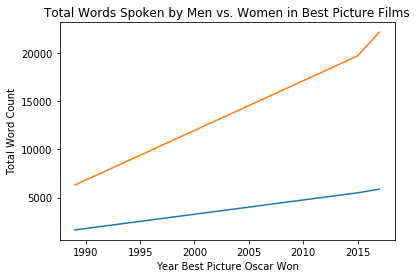

In [68]:
plt.plot(graph1)
plt.ylabel('Total Word Count')
plt.xlabel('Year Best Picture Oscar Won')
plt.title('Total Words Spoken by Men vs. Women in Best Picture Films')
# plot (1 point)

Text(0.5, 1.0, 'Total Words Spoken by Women in Best Picture Films')

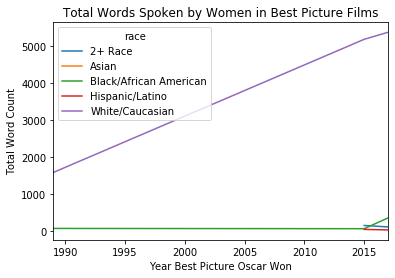

In [69]:
graph2 = females.pivot_table(index='year',columns=['race'],values='words',aggfunc='count')
graph2.plot()
plt.ylabel('Total Word Count')
plt.xlabel('Year Best Picture Oscar Won')
plt.title('Total Words Spoken by Women in Best Picture Films')
# plot (1 point)

Text(0.5, 1.0, 'Total Words Spoken by Men in Best Picture Films')

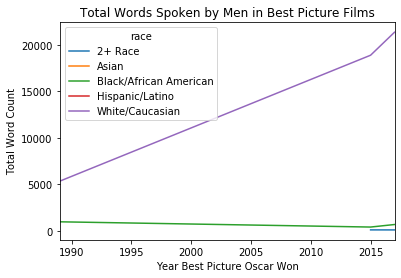

In [70]:
graph2 = males.pivot_table(index='year',columns=['race'],values='words',aggfunc='count')
graph2.plot()
plt.ylabel('Total Word Count')
plt.xlabel('Year Best Picture Oscar Won')
plt.title('Total Words Spoken by Men in Best Picture Films')
# plot (1 point)

In [71]:
genderpercent2.head()

gender,female,male,malePercent,femalePercent
year,,,,
1989,1655,6300,79.195475,20.804525
2015,5492,19662,78.166494,21.833506
2017,5875,22113,79.008861,20.991139


In [72]:
racepercent.head()

race,2+ Race,Asian,Black/African American,Hispanic/Latino,White/Caucasian,WhitePercent,AllElsePercent
year,,,,,,,
1989,0.0,0.0,1037.0,0.0,6918.0,86.964173,13.035827
2015,248.0,194.0,466.0,186.0,24060.0,95.650791,4.349209
2017,206.0,0.0,1031.0,30.0,26721.0,95.473060,4.526940


In [73]:
genderpercent3 = genderpercent2.drop(columns=['female','male'])
genderpercent3.head()

gender,malePercent,femalePercent
year,,
1989,79.195475,20.804525
2015,78.166494,21.833506
2017,79.008861,20.991139


In [74]:
allpercent = pd.merge(genderpercent3,racepercent,on='year')
newallpercent = allpercent.drop(columns=['2+ Race','Asian','Black/African American','Hispanic/Latino','White/Caucasian'])
newallpercent

,malePercent,femalePercent,WhitePercent,AllElsePercent
year,,,,
1989,79.195475,20.804525,86.964173,13.035827
2015,78.166494,21.833506,95.650791,4.349209
2017,79.008861,20.991139,95.473060,4.526940


Text(0.5, 1.0, 'Percent of Words Spoken Best Picture Films')

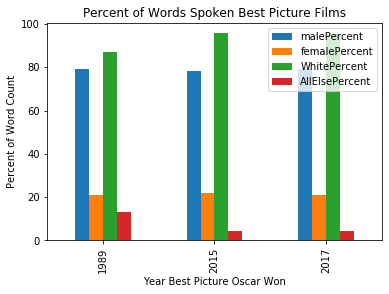

In [75]:
newallpercent.plot.bar()
plt.ylabel('Percent of Word Count')
plt.xlabel('Year Best Picture Oscar Won')
plt.title('Percent of Words Spoken Best Picture Films')
# plot (1 point)

Text(0.5, 1.0, 'Percent of Words Spoken Best Picture Films')

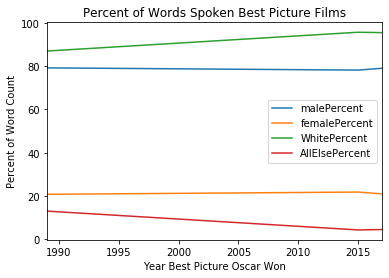

In [76]:
newallpercent.plot()
plt.ylabel('Percent of Word Count')
plt.xlabel('Year Best Picture Oscar Won')
plt.title('Percent of Words Spoken Best Picture Films')
# plot (1 point)